In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
Auto_sales_path = "csv/2020_US_AUTO_SALES_BY_MODEL.csv"
Auto_industry_path = "csv/US_AUTO_INDUSTRY_SALES.csv"
Auto_manufacturer_path = "csv/US_SALES_BY_MANUFACTURER.csv"
Auto_sale_state_path = "csv/Car_sale_by_state.csv"
USA_cars_path = "csv/USA_cars_datasets.csv"
USA_cars_inventory_path = "csv/Domestic_Auto_Inventories.csv"
US_population_path="csv/US_population.csv"
US_Infection_rate_path="csv/Infection_rate.csv"


# Read the mouse data and the study results
Auto_sales_df = pd.read_csv(Auto_sales_path)
Auto_industry_df = pd.read_csv(Auto_industry_path)
Auto_manufacturer_df = pd.read_csv(Auto_manufacturer_path)
Auto_sale_state_df = pd.read_csv(Auto_sale_state_path)
USA_cars_df=pd.read_csv(USA_cars_path)
USA_cars_inventory_df=pd.read_csv(USA_cars_inventory_path)
US_population_df=pd.read_csv(US_population_path)
US_Infection_rate_df=pd.read_csv(US_Infection_rate_path)

In [50]:
Auto_sale_state_df.head()

,State,2020,2019,2018
0,California,107.7,114.9,120.1
1,Texas,91.1,94.2,92.0
2,Florida,83.0,80.5,80.4
3,New York,59.9,62.2,61.3
4,Michigan,38.2,40.0,39.3


In [51]:
Auto_sale_state_df=Auto_sale_state_df.rename(columns={
    "State":"State",
    "2020":"2020_Car_Sale",
    "2019":"2019_Car_Sale",
    "2018":"2018_Car_Sale"})
Auto_sale_state_df.head()

,State,2020_Car_Sale,2019_Car_Sale,2018_Car_Sale
0,California,107.7,114.9,120.1
1,Texas,91.1,94.2,92.0
2,Florida,83.0,80.5,80.4
3,New York,59.9,62.2,61.3
4,Michigan,38.2,40.0,39.3


In [52]:
Auto_sale_state_df=Auto_sale_state_df[["State", "2018_Car_Sale", "2019_Car_Sale","2020_Car_Sale"]]
Auto_sale_state_df.head()

,State,2018_Car_Sale,2019_Car_Sale,2020_Car_Sale
0,California,120.1,114.9,107.7
1,Texas,92.0,94.2,91.1
2,Florida,80.4,80.5,83.0
3,New York,61.3,62.2,59.9
4,Michigan,39.3,40.0,38.2


In [53]:
US_population_df.head()

,State,Population_2010_Census,Population_2020_Census,Change,Percent_Change
0,California,37253956,39538223,2284267,6.13%
1,Texas,25145561,29145505,3999944,15.91%
2,Florida,18801310,21538187,2736877,14.56%
3,New York,19378102,20201249,823147,4.25%
4,Pennsylvania,12702379,13002700,300321,2.36%


In [54]:
US_population_df.dtypes

State                     object
Population_2010_Census     int64
Population_2020_Census     int64
Change                     int64
Percent_Change            object
dtype: object

In [55]:
CAR_SALE_STATE_POPULATION_df=pd.merge(Auto_sale_state_df, US_population_df, how="left", on=["State", "State"])
# Display the data table for preview
CAR_SALE_STATE_POPULATION_df.head()

,State,2018_Car_Sale,2019_Car_Sale,2020_Car_Sale,Population_2010_Census,Population_2020_Census,Change,Percent_Change
0,California,120.1,114.9,107.7,37253956,39538223,2284267,6.13%
1,Texas,92.0,94.2,91.1,25145561,29145505,3999944,15.91%
2,Florida,80.4,80.5,83.0,18801310,21538187,2736877,14.56%
3,New York,61.3,62.2,59.9,19378102,20201249,823147,4.25%
4,Michigan,39.3,40.0,38.2,9883640,10077331,193691,1.96%


In [56]:
CAR_SALE_STATE_POPULATION_df["2020_Car_Sale"]=CAR_SALE_STATE_POPULATION_df["2020_Car_Sale"]*1000000000

In [57]:
CAR_SALE_STATE_POPULATION_df.dtypes

State                      object
2018_Car_Sale             float64
2019_Car_Sale             float64
2020_Car_Sale             float64
Population_2010_Census      int64
Population_2020_Census      int64
Change                      int64
Percent_Change             object
dtype: object

In [58]:
CAR_SALE_STATE_POPULATION_df["Average_car_sale_per_person"]=round(CAR_SALE_STATE_POPULATION_df["2020_Car_Sale"]/CAR_SALE_STATE_POPULATION_df["Population_2020_Census"],2)


In [59]:
CAR_SALE_STATE_POPULATION_df.head(20)

,State,2018_Car_Sale,2019_Car_Sale,2020_Car_Sale,Population_2010_Census,Population_2020_Census,Change,Percent_Change,Average_car_sale_per_person
0,California,120.1,114.9,1.077000e+11,37253956,39538223,2284267,6.13%,2723.95
1,Texas,92.0,94.2,9.110000e+10,25145561,29145505,3999944,15.91%,3125.70
2,Florida,80.4,80.5,8.300000e+10,18801310,21538187,2736877,14.56%,3853.62
3,New York,61.3,62.2,5.990000e+10,19378102,20201249,823147,4.25%,2965.16
4,Michigan,39.3,40.0,3.820000e+10,9883640,10077331,193691,1.96%,3790.69
5,Pennsylvania,40.2,39.9,3.800000e+10,12702379,13002700,300321,2.36%,2922.47
6,Ohio,36.8,37.6,3.740000e+10,11536504,11799448,262944,2.28%,3169.64
7,Illinois,37.6,39.1,3.440000e+10,12830632,12822739,-7893,-0.06%,2682.73
8,New Jersey,35.6,36.9,3.410000e+10,8791894,9288994,497100,5.65%,3671.01
9,Oklahoma,46.5,46.5,3.150000e+10,3751351,3959353,208002,5.54%,7955.85


In [60]:
Average_car_df=CAR_SALE_STATE_POPULATION_df[["State","Average_car_sale_per_person"]].set_index("State")
Average_car_df.head()

,Average_car_sale_per_person
State,
California,2723.95
Texas,3125.70
Florida,3853.62
New York,2965.16
Michigan,3790.69


In [81]:
Rank_df=Average_car_df.sort_values("Average_car_sale_per_person", ascending=False)

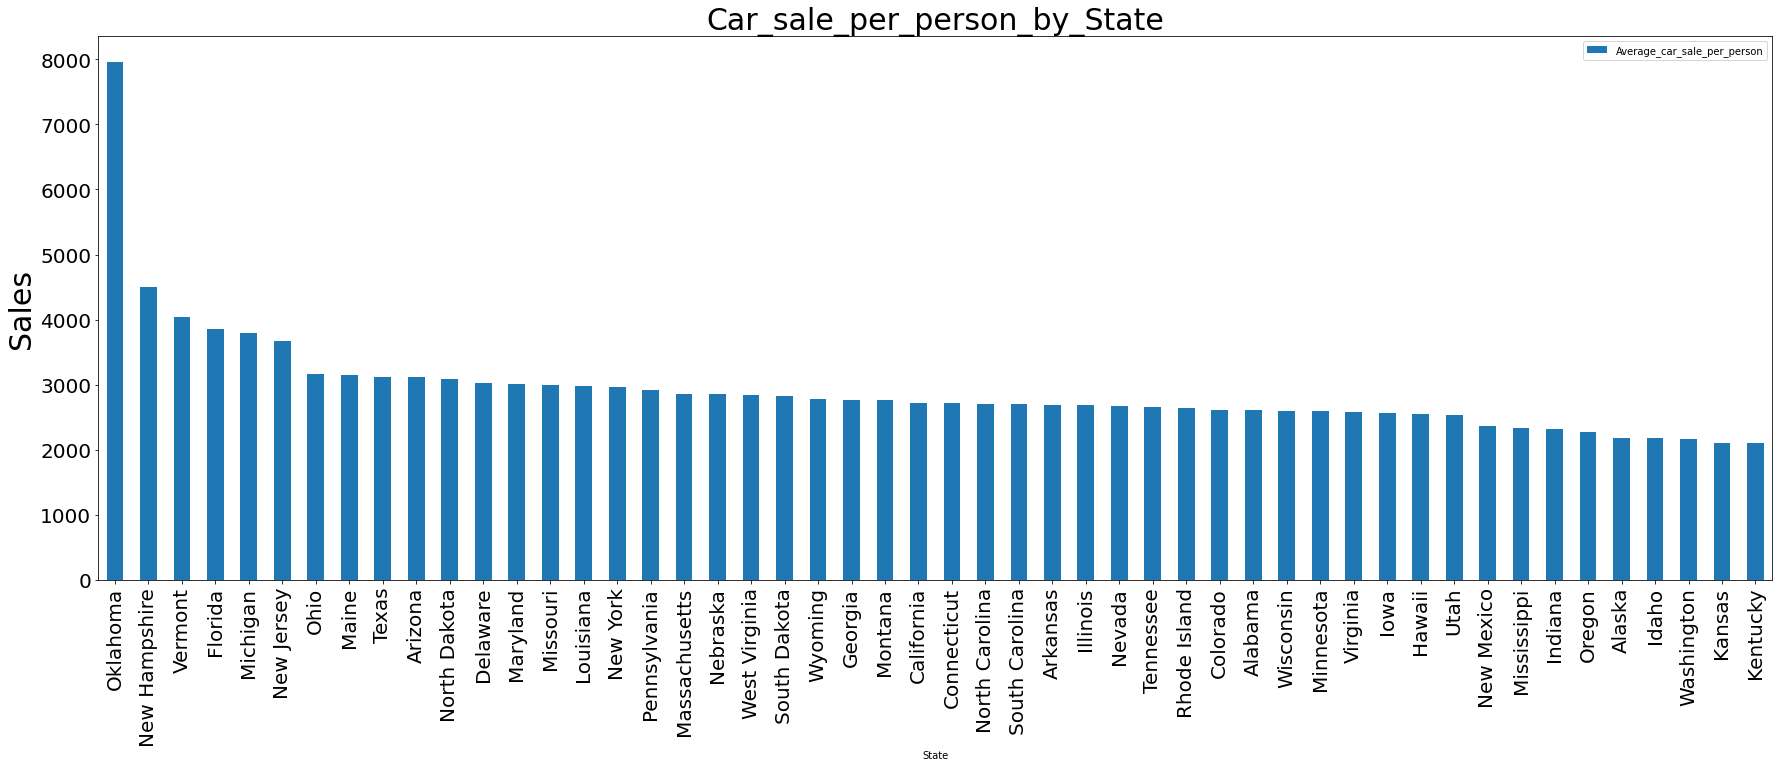

<Figure size 432x288 with 0 Axes>

In [82]:
Rank_df.plot(kind="bar", figsize=(30,10))
plt.title("Car_sale_per_person_by_State", fontsize=30)
plt.ylabel("Sales", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Car_sale_per_person_by_State_2020.png")
plt.show()
plt.tight_layout()


In [62]:
US_Infection_rate_df.head()

,Unnamed: 0,state,Cases,Mean,Population,Infection Rate
0,0,Alabama,83039,3587.029276,4903185,1.693573
1,1,Alaska,32413,874.319037,731545,4.430760
2,2,Arizona,573082,23094.614915,7278717,7.873393
3,3,Arkansas,44983,2001.059092,3017804,1.490587
4,4,California,1276254,27537.130389,39512223,3.230023


In [63]:
State_Infection_rate_df=US_Infection_rate_df.iloc[:, 1:]
State_Infection_rate_df.head()

,state,Cases,Mean,Population,Infection Rate
0,Alabama,83039,3587.029276,4903185,1.693573
1,Alaska,32413,874.319037,731545,4.430760
2,Arizona,573082,23094.614915,7278717,7.873393
3,Arkansas,44983,2001.059092,3017804,1.490587
4,California,1276254,27537.130389,39512223,3.230023


In [64]:
State_Infection_rate_df=State_Infection_rate_df.rename(columns={
    "state":"State"})
State_Infection_rate_df.head()

,State,Cases,Mean,Population,Infection Rate
0,Alabama,83039,3587.029276,4903185,1.693573
1,Alaska,32413,874.319037,731545,4.430760
2,Arizona,573082,23094.614915,7278717,7.873393
3,Arkansas,44983,2001.059092,3017804,1.490587
4,California,1276254,27537.130389,39512223,3.230023


In [65]:
Auto_sale_state_df.head()

,State,2018_Car_Sale,2019_Car_Sale,2020_Car_Sale
0,California,120.1,114.9,107.7
1,Texas,92.0,94.2,91.1
2,Florida,80.4,80.5,83.0
3,New York,61.3,62.2,59.9
4,Michigan,39.3,40.0,38.2


In [75]:
state_infect_sale_df=pd.merge(Auto_sale_state_df, State_Infection_rate_df, how="left", on=["State", "State"])

state_infect_sale_df.to_csv("csv/Sale_infection_rate_2020.csv", index=False, header=True)

In [76]:
state_infect_sale_df.head()

,State,2018_Car_Sale,2019_Car_Sale,2020_Car_Sale,Cases,Mean,Population,Infection Rate
0,California,120.1,114.9,107.7,1276254,27537.130389,39512223,3.230023
1,Texas,92.0,94.2,91.1,411554,5101.147143,28995881,1.419353
2,Florida,80.4,80.5,83.0,533821,14784.461551,21477737,2.485462
3,New York,61.3,62.2,59.9,284750,14159.623577,19453561,1.463742
4,Michigan,39.3,40.0,38.2,167250,4351.098800,9986857,1.674701


The correlation between both factors is 0.8


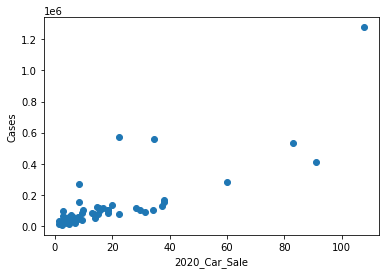

In [83]:
Car_Sale= state_infect_sale_df.iloc[:,3]
Cases = state_infect_sale_df.iloc[:,4]
correlation = st.pearsonr(Car_Sale, Cases)
print(f"The correlation between both factors is {round(correlation[0], 2)}")

plt.scatter(state_infect_sale_df.iloc[:,3],state_infect_sale_df.iloc[:,4])
plt.xlabel('2020_Car_Sale')
plt.ylabel('Cases')
plt.show()

In [92]:
State_Infection_rate_df.sort_values("Infection Rate", ascending=False)
Top_5_Infection_rate_df=State_Infection_rate_df[["State","Infection Rate"]].sort_values("Infection Rate", ascending=False)
Top_5_Infection_rate_df=Top_5_Infection_rate_df.iloc[0:10,:]
Top_5_Infection_rate_df.head()

,State,Infection Rate
40,Rhode Island,9.428703
28,Nevada,8.891108
2,Arizona,7.873393
8,District of Columbia,7.080846
7,Delaware,6.729557


In [94]:
#Merger
Sale_infect_rank_df=pd.merge(Top_5_Infection_rate_df, Average_car_df, how="left", on=["State", "State"])
Sale_infect_rank_df

,State,Infection Rate,Average_car_sale_per_person
0,Rhode Island,9.428703,2642.66
1,Nevada,8.891108,2673.44
2,Arizona,7.873393,3118.23
3,District of Columbia,7.080846,NaN
4,Delaware,6.729557,3030.46
5,Utah,4.908767,2536.97
6,Alaska,4.430760,2181.65
7,Illinois,4.428472,2682.73
8,Nebraska,3.709404,2854.95
9,South Dakota,3.600370,2819.55


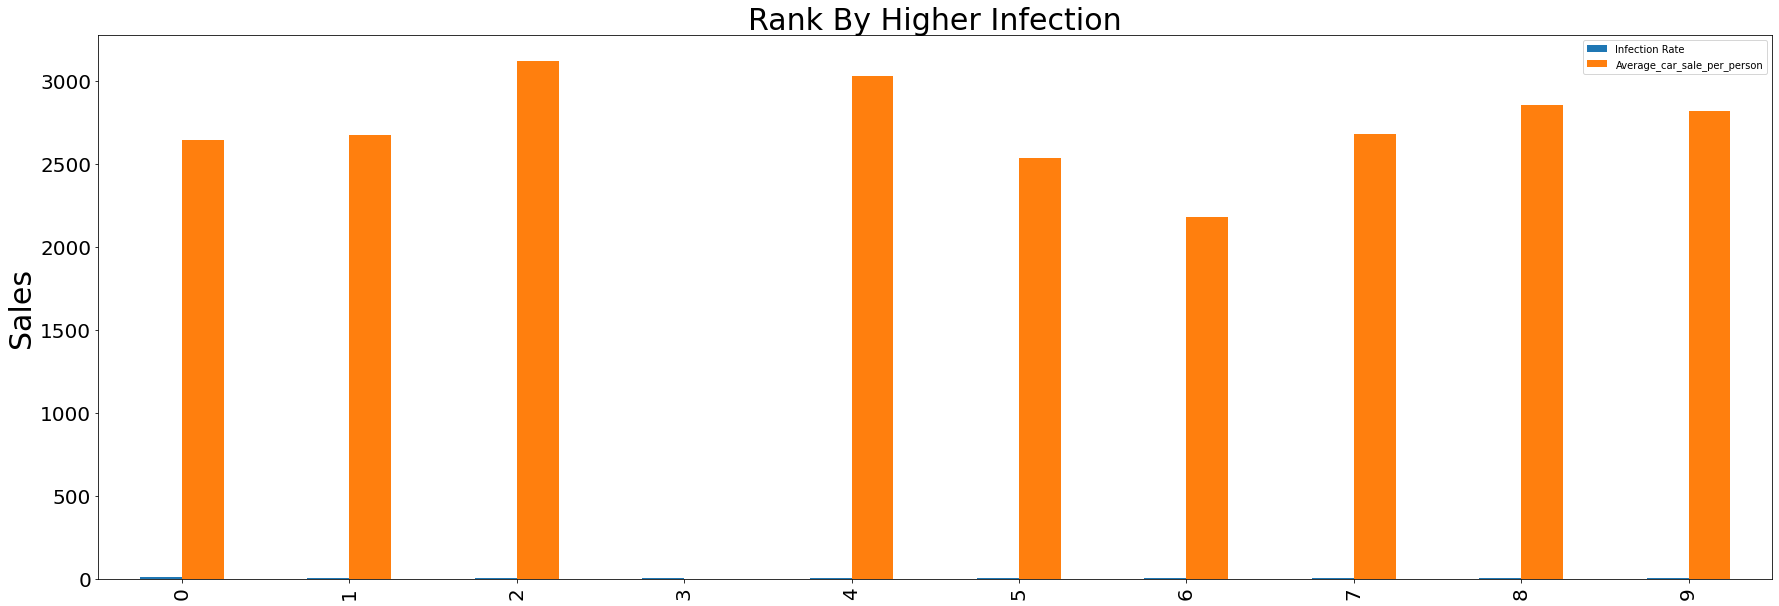

<Figure size 432x288 with 0 Axes>

In [95]:
Sale_infect_rank_df.plot(kind="bar", figsize=(30,10))
plt.title("Rank By Higher Infection", fontsize=30)
plt.ylabel("Sales", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.tight_layout()



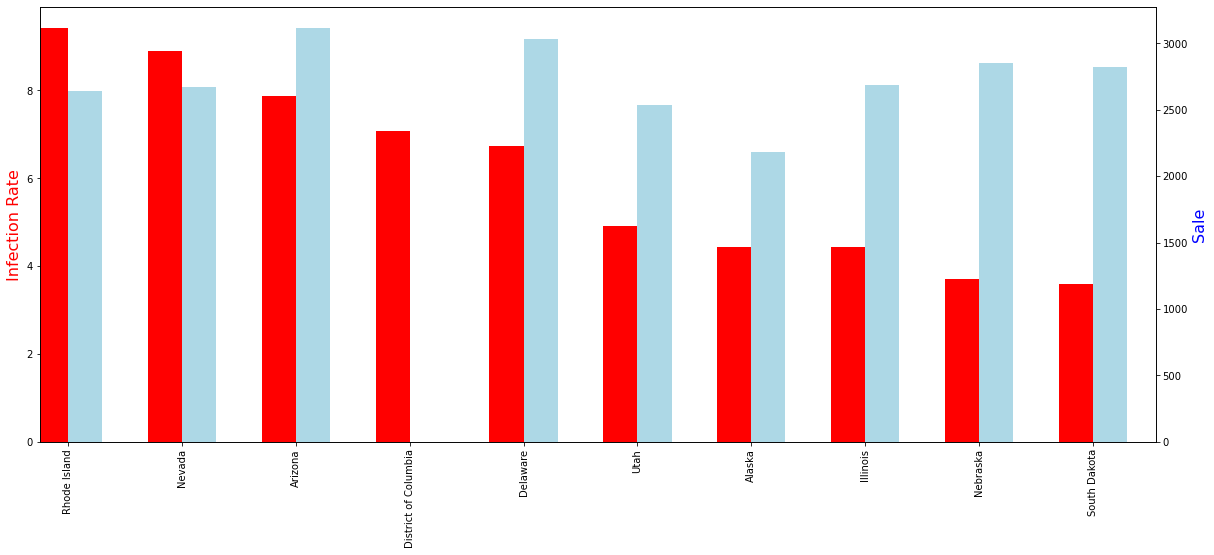

In [110]:
fig = plt.figure(figsize=(20,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

Sale_infect_rank_df.iloc[:,1].plot(kind='bar', color='red', ax=ax, width=width, position=1)
Sale_infect_rank_df.Average_car_sale_per_person.plot(kind='bar', color='Lightblue', ax=ax2, width=width, position=0)

ax.set_ylabel('Infection Rate', fontsize=16, color="red")
ax2.set_ylabel('Sale', fontsize=16, color="blue")

x_axis=np.arange(len(Sale_infect_rank_df))
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Rhode Island","Nevada", "Arizona", "District of Columbia", "Delaware", "Utah",
                           "Alaska", "Illinois", "Nebraska", "South Dakota"] , rotation='vertical')

plt.show()